In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f90a9a6a4d10f8dbb166b598dac8f769


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | shaartuz
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | jujuy
City not found. Skipping...
Processing Record 15 of Set 1 | meyungs
City not found. Skipping...
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | port augusta
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | 

Processing Record 39 of Set 4 | calatayud
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | cape town
Processing Record 42 of Set 4 | hirara
Processing Record 43 of Set 4 | emerald
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | oparino
Processing Record 46 of Set 4 | gretna
Processing Record 47 of Set 4 | mehamn
Processing Record 48 of Set 4 | tabou
Processing Record 49 of Set 4 | coihaique
Processing Record 50 of Set 4 | tilichiki
Processing Record 1 of Set 5 | mazagao
Processing Record 2 of Set 5 | boa vista
Processing Record 3 of Set 5 | kyzyl
Processing Record 4 of Set 5 | norman wells
Processing Record 5 of Set 5 | abu jubayhah
City not found. Skipping...
Processing Record 6 of Set 5 | kushiro
Processing Record 7 of Set 5 | takoradi
Processing Record 8 of Set 5 | codrington
Processing Record 9 of Set 5 | esperance
Processing Record 10 of Set 5 | hami
Processing Record 11 of Set 5 | caravelas
Processing Record 12 of Set 5 | longyearbyen
Pr

Processing Record 27 of Set 8 | kahului
Processing Record 28 of Set 8 | bartica
Processing Record 29 of Set 8 | erdenet
Processing Record 30 of Set 8 | riihimaki
Processing Record 31 of Set 8 | inirida
Processing Record 32 of Set 8 | balao
Processing Record 33 of Set 8 | aswan
Processing Record 34 of Set 8 | alofi
Processing Record 35 of Set 8 | bestobe
Processing Record 36 of Set 8 | charters towers
Processing Record 37 of Set 8 | kapit
Processing Record 38 of Set 8 | peterlee
Processing Record 39 of Set 8 | tautira
Processing Record 40 of Set 8 | tambovka
Processing Record 41 of Set 8 | novikovo
Processing Record 42 of Set 8 | amberley
Processing Record 43 of Set 8 | san juan
Processing Record 44 of Set 8 | umea
Processing Record 45 of Set 8 | lompoc
Processing Record 46 of Set 8 | kamaishi
Processing Record 47 of Set 8 | lapa
Processing Record 48 of Set 8 | acajutla
Processing Record 49 of Set 8 | kieta
Processing Record 50 of Set 8 | samalaeulu
City not found. Skipping...
Processin

Processing Record 20 of Set 12 | grand centre
City not found. Skipping...
Processing Record 21 of Set 12 | cabinda
Processing Record 22 of Set 12 | yabrud
Processing Record 23 of Set 12 | borogontsy
Processing Record 24 of Set 12 | pangnirtung
Processing Record 25 of Set 12 | nioro
Processing Record 26 of Set 12 | bayangol
Processing Record 27 of Set 12 | ostrovnoy
Processing Record 28 of Set 12 | phagwara
Processing Record 29 of Set 12 | rocha
Processing Record 30 of Set 12 | neiafu
Processing Record 31 of Set 12 | kisangani
Processing Record 32 of Set 12 | ballyshannon
Processing Record 33 of Set 12 | imisli
City not found. Skipping...
Processing Record 34 of Set 12 | pemangkat
Processing Record 35 of Set 12 | urucara
Processing Record 36 of Set 12 | qaqortoq
Processing Record 37 of Set 12 | olafsvik
Processing Record 38 of Set 12 | maulvi bazar
City not found. Skipping...
Processing Record 39 of Set 12 | mahoba
Processing Record 40 of Set 12 | lvov
Processing Record 41 of Set 12 | r

In [10]:
len(city_data)

565

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,3.45,95,100,7.90,RU,2021-03-27 20:22:03
1,Atuona,-9.8000,-139.0333,80.26,81,53,19.98,PF,2021-03-27 20:22:04
2,Souillac,-20.5167,57.5167,77.00,83,75,5.75,MU,2021-03-27 20:22:04
3,Mar Del Plata,-38.0023,-57.5575,62.01,94,90,20.71,AR,2021-03-27 20:18:14
4,Busselton,-33.6500,115.3333,54.00,94,0,8.34,AU,2021-03-27 20:21:21
5,Saint George,37.1041,-113.5841,60.80,21,1,6.91,US,2021-03-27 20:21:01
6,East London,-33.0153,27.9116,66.90,76,83,14.88,ZA,2021-03-27 20:21:27
7,Puerto Ayora,-0.7393,-90.3518,82.40,74,20,13.80,EC,2021-03-27 20:18:50
8,Ponta Do Sol,32.6667,-17.1000,64.40,88,75,20.71,PT,2021-03-27 20:18:10
9,Kapaa,22.0752,-159.3190,77.00,78,40,12.66,US,2021-03-27 20:22:05


In [12]:
# Reorder columns in city_data_df DataFrame.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2021-03-27 20:22:03,71.9667,102.5000,3.45,95,100,7.90
1,Atuona,PF,2021-03-27 20:22:04,-9.8000,-139.0333,80.26,81,53,19.98
2,Souillac,MU,2021-03-27 20:22:04,-20.5167,57.5167,77.00,83,75,5.75
3,Mar Del Plata,AR,2021-03-27 20:18:14,-38.0023,-57.5575,62.01,94,90,20.71
4,Busselton,AU,2021-03-27 20:21:21,-33.6500,115.3333,54.00,94,0,8.34
5,Saint George,US,2021-03-27 20:21:01,37.1041,-113.5841,60.80,21,1,6.91
6,East London,ZA,2021-03-27 20:21:27,-33.0153,27.9116,66.90,76,83,14.88
7,Puerto Ayora,EC,2021-03-27 20:18:50,-0.7393,-90.3518,82.40,74,20,13.80
8,Ponta Do Sol,PT,2021-03-27 20:18:10,32.6667,-17.1000,64.40,88,75,20.71
9,Kapaa,US,2021-03-27 20:22:05,22.0752,-159.3190,77.00,78,40,12.66


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

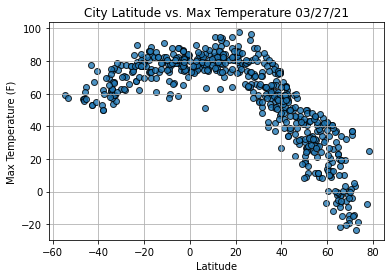

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

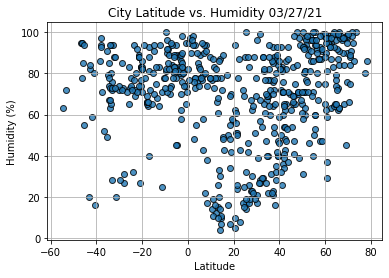

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

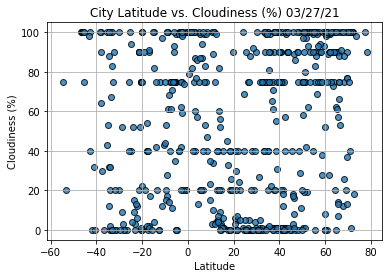

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

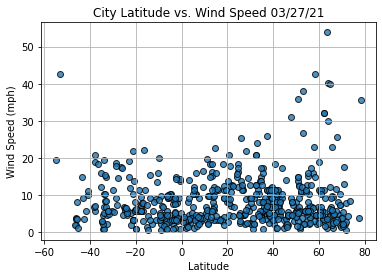

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and
# plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

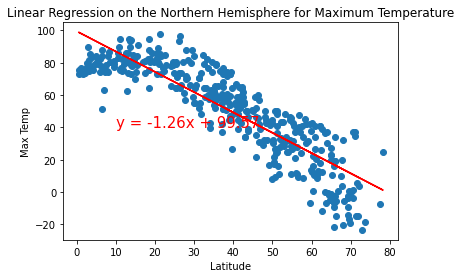

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.874


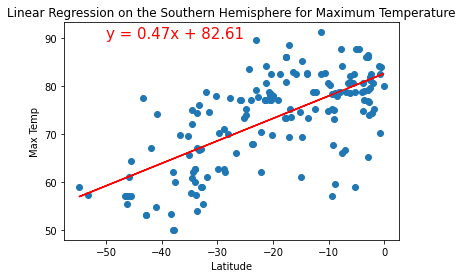

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.663


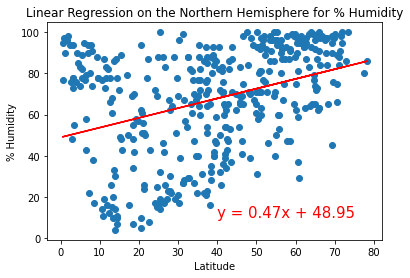

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.364


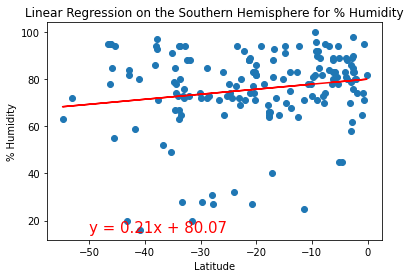

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.172


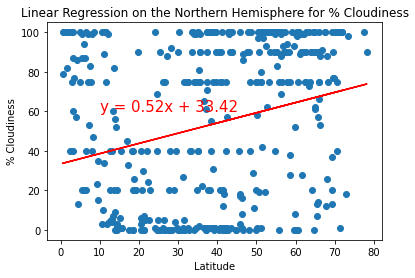

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,60))

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.258


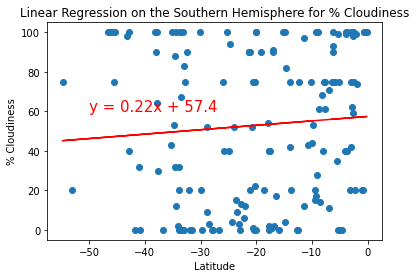

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.079


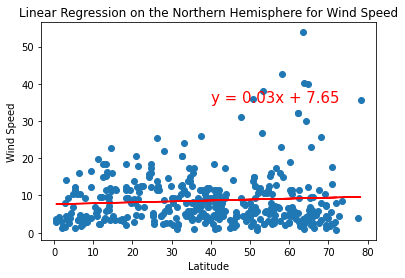

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.070


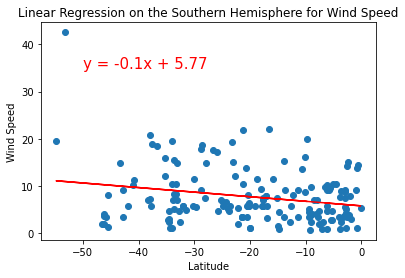

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the r-value
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.229
